# **Ejercicios de pair programming Módulo 2 Sprint 1**
## **Estadística: Lección 2**
### **Cuartiles, estadística con pandas y tabla de frecuencia**

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando ayer y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.

Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

Se ruega a la hora de realizar la entrega que incluyáis el conjunto de datos que hayáis decidido emplear para estos ejercicios.

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns

In [103]:
games = pd.read_csv("data/games.csv", index_col = 0)
games.head(2)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,39000,39000,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,38000,46000,48000
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,29000,29000,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,32000,63000,36000


Información del contenido de las columnas

Title - Title of the Game.

Release Date - Date of release of the game's first version

Team - Game developer team

Rating - Average rating

Times Listed - Number of users who listed this game

Number of Reviews - Number of reviews received from the users

Genres - All genres pertaining to a specified game

Summary - Summary provided by the team

Reviews - User reviews

Plays - Number of users that have played the game before

Playing - Number of current users who are playing the game

Backlogs - Number of users who have access but haven't started with the game yet

Wishlist- Number of users who wish to play the game

In [104]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   int64  
 5   Number of Reviews  1512 non-null   int64  
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   int64  
 10  Playing            1512 non-null   int64  
 11  Backlogs           1512 non-null   int64  
 12  Wishlist           1512 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 165.4+ KB


1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo

- Percentiles 25, 75


In [105]:
#Para la columna Number of Reviews

Q1_nr, Q3_nr = np.percentile(games["Number of Reviews"], (25, 75))
print(f"El percentil 25 es {Q1_nr}")
print(f"El percentil 75 es {Q3_nr}")

El percentil 25 es 284.0
El percentil 75 es 1000.0


In [106]:
#Para la columna Plays

Q1_p, Q3_p = np.percentile(games["Plays"], (25, 75))
print(f"El percentil 25 es {Q1_p}")
print(f"El percentil 75 es {Q3_p}")

El percentil 25 es 12000.0
El percentil 75 es 45000.0


In [107]:
#Para la columna Number of Wishlist

Q1_w, Q3_w = np.percentile(games["Wishlist"], (25, 75))
print(f"El percentil 25 es {Q1_w}")
print(f"El percentil 75 es {Q3_w}")

El percentil 25 es 212.0
El percentil 75 es 2000.0


- Rango Intercuartílico


In [108]:
#Para la columna Number of Reviews

ri_nr = Q3_nr - Q1_nr
ri_nr


716.0

In [109]:
#Para la columna Plays

ri_p = Q3_p - Q1_p
ri_p


33000.0

In [110]:
#Para la columna Wishlist

ri_w = Q3_w - Q1_w
ri_w


1788.0

- Boxplot de algunas variables


<AxesSubplot:xlabel='Number of Reviews'>

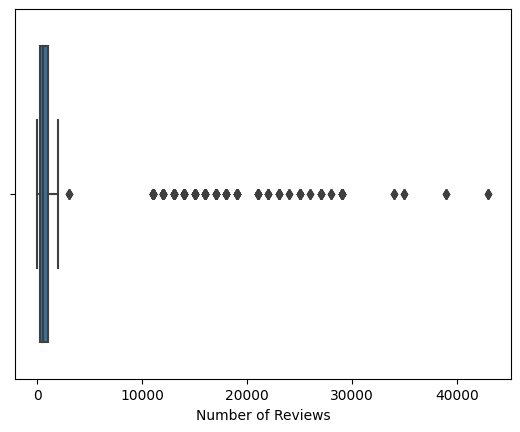

In [111]:
#Para la columna Number of Reviews

sns.boxplot(x = "Number of Reviews", data = games)


<AxesSubplot:xlabel='Plays'>

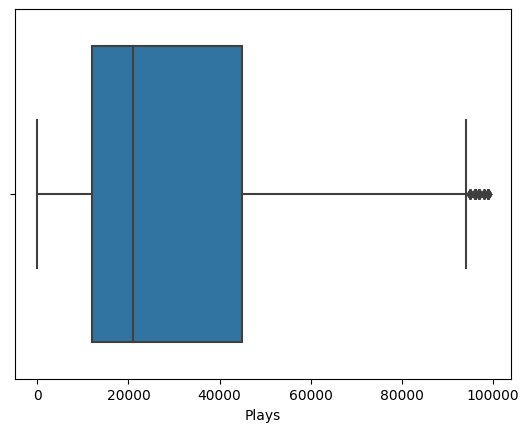

In [112]:
#Para la columna Plays

sns.boxplot(x = "Plays", data = games)

<AxesSubplot:xlabel='Wishlist'>

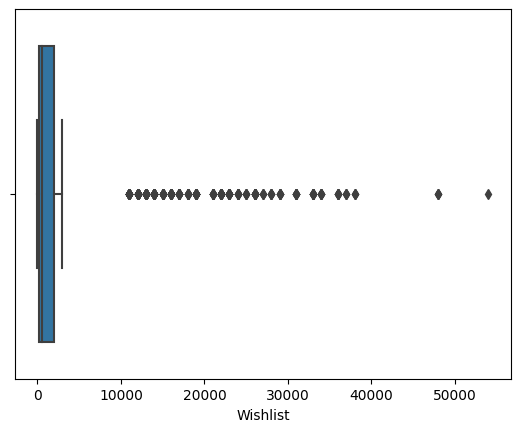

In [113]:
#Para la columna Number of Wishlist

sns.boxplot(x = "Wishlist", data = games)

- Tabla de frecuencias


In [114]:
#Para la columna Number of Reviews

tabfec_nr = games.groupby("Number of Reviews").count().reset_index().sort_values(by = "Number of Reviews", ascending = False)
tabfec_nr.head(2)


,Number of Reviews,Title,Release Date,Team,Rating,Times Listed,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
605,43000,3,3,3,3,3,3,3,3,3,3,3,3
604,39000,3,3,3,3,3,3,3,3,3,3,3,3


In [115]:
#Para la columna Number of Plays

tabfec_nr = games.groupby("Plays").count().reset_index().sort_values(by = "Plays", ascending = False)
tabfec_nr.head(5)

,Plays,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Playing,Backlogs,Wishlist
242,99000,7,7,7,7,7,7,7,7,7,7,7,7
241,98000,3,3,3,3,3,3,3,3,3,3,3,3
240,97000,6,6,6,6,6,6,6,6,6,6,6,6
239,96000,11,11,11,11,11,11,11,11,11,11,11,11
238,95000,4,4,4,4,4,4,4,4,4,4,4,4


In [116]:
#Para la columna Number of Wishlist

tabfec_nr = games.groupby("Wishlist").count().reset_index().sort_values(by = "Wishlist", ascending = False)
tabfec_nr.head(2)

,Wishlist,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs
572,54000,1,1,1,0,1,1,1,1,1,1,1,1
571,48000,3,3,3,3,3,3,3,3,3,3,3,3


- Variables cualitativas

    Después de nuestro procesado, las variables cualitativas del dataframe son:
     - 'Title'
     - 'Release Date'
     - 'Team'
     - 'Genres'
     - 'Summary'
     - 'Reviews'

- Variables cuantitativas
    
    Después de nuestro procesado, las variables cualitativas del dataframe son:
     - 'Rating'
     - 'Times Listed'
     - 'Number of Reviews'
     - 'Plays'
     - 'Playing'
     - 'Backlogs'
     - 'Wishlist'


- Frecuencia acumulada


In [117]:
games.groupby("Number of Reviews").count().reset_index().sort_values(by = "Number of Reviews", ascending = False).cumsum()

,Number of Reviews,Title,Release Date,Team,Rating,Times Listed,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
605,43000,3,3,3,3,3,3,3,3,3,3,3,3
604,82000,6,6,6,6,6,6,6,6,6,6,6,6
603,117000,9,9,9,9,9,9,9,9,9,9,9,9
602,151000,12,12,12,12,12,12,12,12,12,12,12,12
601,180000,33,33,33,33,33,33,33,33,33,33,33,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,769870,1506,1506,1505,1495,1506,1506,1505,1506,1506,1506,1506,1506
3,769886,1509,1509,1508,1498,1509,1509,1508,1509,1509,1509,1509,1509
2,769894,1510,1510,1509,1499,1510,1510,1509,1510,1510,1510,1510,1510
1,769896,1511,1511,1510,1499,1511,1511,1510,1511,1511,1511,1511,1511


In [118]:
games["Interval Reviews"] = pd.cut(games["Number of Reviews"], bins= (0, 100, 1000, 10000, 100000), labels = ["Muy bajo", "Bajo", "Alto", "Muy alto"])

frecuencia = (games.groupby("Interval Reviews").agg(frequency=("Number of Reviews", "count")))


In [119]:
frecuencia_acumulada["cum_frequency"] = frecuencia["frequency"].cumsum()
frecuencia_acumulada

,frequency,cum_frequency
Interval Reviews,,
Muy bajo,83,83
Bajo,1070,1153
Alto,16,1169
Muy alto,342,1511


- Representación de al menos una tabla de frecuencias

<AxesSubplot:xlabel='Interval Reviews', ylabel='count'>

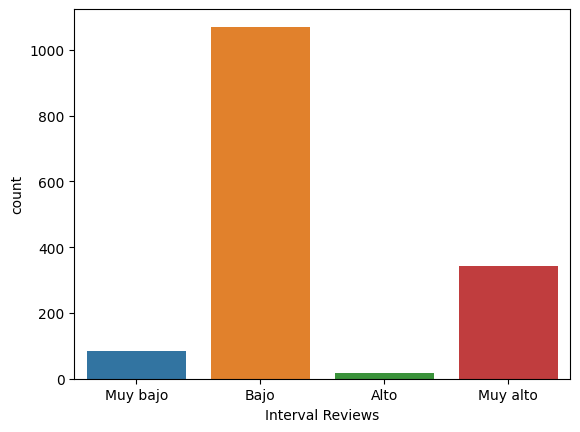

In [120]:
sns.countplot(x="Interval Reviews", data = games)

2. Interpretación de los resultados.

Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Estas son algunas de nuestras observaciones respecto a este dataset con los estadísticos explorados en este pair:

 - Como hemos realizado cada ejercicio para tres columnas específicas, Number of Reviews (que, recordemos, tiene los mismos datos que Times Listed), Plays y Wishlist, hemos podido comparar en detalle cada uno de estos tres subconjuntos de datos. De esta exploración deducimos que tanto la columna Number of Reviews como la columna Wishlist tienen estadísticos muy poco robustos ya que su dispersión y su heterogeneidad son muy amplias. Ambas tienen un pronunciado sesgo hacia la derecha que propicia que los outliers influyan extremadamente en los indicadores de todo el conjunto. No es así el caso para la columna Plays, que parece estar mucho más balanceada aunque también tiene una tendencia a presentar valores atípicos por la derecha. 
  - Teorizamos sobre si esta diferencia puede deberse a que las dos columnas con más outliers trabajan sobre datos de tipo comentario, más abierto y sujeto a cambios superficiales, dado que se trata de una lista de reseñas en internet en la que puede participar cualquiera, en el primer caso, y de una lista de deseos que cualquiera puede usar, en el segundo, mientras que la columna Plays trabaja sobre datos de tipo más realista, que exigen de la compra del juego (un umbral más difícil de cumplir), para afectar al dato.
  